# import

1. 현재 페이지에서 사용되는 전체 import 선언

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, Normalizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping


# 데이터 불러오기

1. feature_path에 추출할 데이터 경로 지정

In [5]:
# 데이터 전처리
extract_feature_original_path = r".\data\original_data\extract_feature(original).csv"
df = pd.read_csv(extract_feature_original_path)
df

C:\Users\USER\AppData\Local\Temp\ipykernel_43868\3755693246.py:3: DtypeWarning: Columns (155,156,157,158,159,160,161,162,163,164,165,203,204,205,206,207,208,209,210,211,212,213) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(extract_feature_original_path)


,file_name,is_pe,DOS_HEADER/e_magic,DOS_HEADER/e_cblp,DOS_HEADER/e_cp,DOS_HEADER/e_crlc,DOS_HEADER/e_cparhdr,DOS_HEADER/e_minalloc,DOS_HEADER/e_maxalloc,DOS_HEADER/e_ss,...,byte_entropy_histogram_55,byte_entropy_histogram_56,byte_entropy_histogram_57,byte_entropy_histogram_58,byte_entropy_histogram_59,byte_entropy_histogram_60,byte_entropy_histogram_61,byte_entropy_histogram_62,byte_entropy_histogram_63,label
0,19253ef0d34202c4b633e85bbc9458be8444ae900f3e14...,True,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,...,33817,7203,4887,3189,5669,2300,1939,1660,1825,0
1,3ef7fdbc5b6acb889d73bf9b8d3badd752aa838c7b39dc...,True,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,...,0,0,0,0,0,0,0,0,0,1
2,cbdb408796576a4e9b550df067ad7074f4f81ece673d24...,True,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,...,33605,0,0,0,0,0,0,0,0,0
3,e53166d1cfbfd1afda2153eaeae3e0a12ecf2c4d1e1e03...,True,0x5a4d,0x50,0x2,0x0,0x4,0xf,0xffff,0x0,...,249421,0,0,0,0,0,0,0,0,0
4,00ab8f6c1c7d6a7c6549c6c2aa317cf0e9b73bc34d30aa...,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34438,9fe0df51775c3935b1f385a5b924bd53218f0711378cbe...,True,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,...,0,0,0,0,0,0,0,0,0,1
34439,9feb6a6642431a56b6699ffd28a8785e2d711c60d5c571...,True,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,...,33045,357,245,239,255,205,240,271,236,1
34440,9fedf5206131f12fc47c5025397003a9a4b474a7e24338...,True,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,...,0,0,0,0,0,0,0,0,0,1
34441,9ff57f0d96d9acd70a97443615827c202175da5827ff23...,True,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,...,0,0,0,0,0,0,0,0,0,1


# none PE 데이터 제거

1. PE 데이터만 저장

2. is_pe 데이터 제거

3. 1, 2번의 데이터를 "extract_feature(PE)"로 저장 (경로는 data 내부)

4. ".\data\extract_feature(PE)" csv 데이터 읽기 (*추후 pe 데이터만 필요하면 읽기 부터 시작*)

In [6]:
# PE 데이터 저장
pe_data = df[df['is_pe'] != False]

# is_pe column 제거 
pe_data = pe_data.drop(columns=['is_pe'])

# 저장 경로 지정
extract_feature_PE_path = r".\data\pe_data\extract_feature(PE).csv"
pe_data.to_csv(extract_feature_PE_path)

pe_data 

,file_name,DOS_HEADER/e_magic,DOS_HEADER/e_cblp,DOS_HEADER/e_cp,DOS_HEADER/e_crlc,DOS_HEADER/e_cparhdr,DOS_HEADER/e_minalloc,DOS_HEADER/e_maxalloc,DOS_HEADER/e_ss,DOS_HEADER/e_sp,...,byte_entropy_histogram_55,byte_entropy_histogram_56,byte_entropy_histogram_57,byte_entropy_histogram_58,byte_entropy_histogram_59,byte_entropy_histogram_60,byte_entropy_histogram_61,byte_entropy_histogram_62,byte_entropy_histogram_63,label
0,19253ef0d34202c4b633e85bbc9458be8444ae900f3e14...,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,0xb8,...,33817,7203,4887,3189,5669,2300,1939,1660,1825,0
1,3ef7fdbc5b6acb889d73bf9b8d3badd752aa838c7b39dc...,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,0xb8,...,0,0,0,0,0,0,0,0,0,1
2,cbdb408796576a4e9b550df067ad7074f4f81ece673d24...,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,0xb8,...,33605,0,0,0,0,0,0,0,0,0
3,e53166d1cfbfd1afda2153eaeae3e0a12ecf2c4d1e1e03...,0x5a4d,0x50,0x2,0x0,0x4,0xf,0xffff,0x0,0xb8,...,249421,0,0,0,0,0,0,0,0,0
5,2aadcda0a3191c09208afb586c68c3e153fbed376ecdae...,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,0xb8,...,107965,31087,30321,29759,31268,29651,30198,30093,31335,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34438,9fe0df51775c3935b1f385a5b924bd53218f0711378cbe...,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,0xb8,...,0,0,0,0,0,0,0,0,0,1
34439,9feb6a6642431a56b6699ffd28a8785e2d711c60d5c571...,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,0xb8,...,33045,357,245,239,255,205,240,271,236,1
34440,9fedf5206131f12fc47c5025397003a9a4b474a7e24338...,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,0xb8,...,0,0,0,0,0,0,0,0,0,1
34441,9ff57f0d96d9acd70a97443615827c202175da5827ff23...,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,0xb8,...,0,0,0,0,0,0,0,0,0,1


In [12]:
# PE 데이터 읽기
extract_feature_PE_path = r".\data\pe_data\extract_feature(PE).csv"
pe_data = pd.read_csv(extract_feature_PE_path)
pe_data = pe_data.drop(columns=['Unnamed: 0'])
pe_data

C:\Users\USER\AppData\Local\Temp\ipykernel_36484\1305812955.py:3: DtypeWarning: Columns (155,156,157,158,159,160,161,162,163,164,165,203,204,205,206,207,208,209,210,211,212,213) have mixed types. Specify dtype option on import or set low_memory=False.
  pe_data = pd.read_csv(extract_feature_PE_path)


,file_name,DOS_HEADER/e_magic,DOS_HEADER/e_cblp,DOS_HEADER/e_cp,DOS_HEADER/e_crlc,DOS_HEADER/e_cparhdr,DOS_HEADER/e_minalloc,DOS_HEADER/e_maxalloc,DOS_HEADER/e_ss,DOS_HEADER/e_sp,...,byte_entropy_histogram_55,byte_entropy_histogram_56,byte_entropy_histogram_57,byte_entropy_histogram_58,byte_entropy_histogram_59,byte_entropy_histogram_60,byte_entropy_histogram_61,byte_entropy_histogram_62,byte_entropy_histogram_63,label
0,19253ef0d34202c4b633e85bbc9458be8444ae900f3e14...,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,0xb8,...,33817,7203,4887,3189,5669,2300,1939,1660,1825,0
1,3ef7fdbc5b6acb889d73bf9b8d3badd752aa838c7b39dc...,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,0xb8,...,0,0,0,0,0,0,0,0,0,1
2,cbdb408796576a4e9b550df067ad7074f4f81ece673d24...,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,0xb8,...,33605,0,0,0,0,0,0,0,0,0
3,e53166d1cfbfd1afda2153eaeae3e0a12ecf2c4d1e1e03...,0x5a4d,0x50,0x2,0x0,0x4,0xf,0xffff,0x0,0xb8,...,249421,0,0,0,0,0,0,0,0,0
4,2aadcda0a3191c09208afb586c68c3e153fbed376ecdae...,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,0xb8,...,107965,31087,30321,29759,31268,29651,30198,30093,31335,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25968,9fe0df51775c3935b1f385a5b924bd53218f0711378cbe...,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,0xb8,...,0,0,0,0,0,0,0,0,0,1
25969,9feb6a6642431a56b6699ffd28a8785e2d711c60d5c571...,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,0xb8,...,33045,357,245,239,255,205,240,271,236,1
25970,9fedf5206131f12fc47c5025397003a9a4b474a7e24338...,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,0xb8,...,0,0,0,0,0,0,0,0,0,1
25971,9ff57f0d96d9acd70a97443615827c202175da5827ff23...,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,0xb8,...,0,0,0,0,0,0,0,0,0,1


# string, hex 데이터 전처리

1. string 데이터 int 변경 (int 형 데이터만 변경)

2. hex 데이터 int 변경

In [7]:
# hex 데이터 int로 변경
def hex_to_decimal(hex_value):
    if isinstance(hex_value, str):
        try:
            if hex_value.startswith("0x"):
                hex_value = hex_value[2:]
            if hex_value == '0.0' or hex_value == '0':
                return 0
            return int(hex_value, 16)
        except ValueError as e:
            print(f"변환 오류 : {e}")
            return hex_value 
    return hex_value

In [8]:
# string 데이터 int로 변경
def hex_string_to_int(hex_string):
    try:
        hex_bytes = hex_string.split()
        byte_array = bytes(int(x, 16) for x in hex_bytes)
        return int.from_bytes(byte_array, byteorder='big')
    except Exception as e:
        print(f"변환 오류: {e} - 값: {hex_string}")
        return 0

In [ ]:
string_to_int_data = pe_data
string_to_int_data = string_to_int_data.drop(columns=['file_name', 'label'])

# 데이터 전처리
if "DOS_HEADER/e_res" in string_to_int_data.columns:
    string_to_int_data['DOS_HEADER/e_res'] = string_to_int_data['DOS_HEADER/e_res'].apply(hex_string_to_int)
if "DOS_HEADER/e_res2" in pe_data.columns:
    string_to_int_data['DOS_HEADER/e_res2'] = string_to_int_data['DOS_HEADER/e_res2'].apply(hex_string_to_int)

noen_hex_to_int_data = string_to_int_data.applymap(hex_to_decimal)
noen_hex_to_int_data = pd.concat([pe_data[['file_name', 'label']], noen_hex_to_int_data], axis=1)

# 데이터 저장
none_hex_string_data_path = r".\data\hex_string_data\extract_feature(PE_none_hex_and_string).csv"    
noen_hex_to_int_data.to_csv(none_hex_string_data_path)


In [14]:
none_hex_string_data_path = r".\data\hex_string_data\extract_feature(PE_none_hex_and_string).csv"
none_hex_string_data = pd.read_csv(none_hex_string_data_path)
none_hex_string_data = none_hex_string_data.drop(columns=['Unnamed: 0'])
none_hex_string_data

,file_name,label,DOS_HEADER/e_magic,DOS_HEADER/e_cblp,DOS_HEADER/e_cp,DOS_HEADER/e_crlc,DOS_HEADER/e_cparhdr,DOS_HEADER/e_minalloc,DOS_HEADER/e_maxalloc,DOS_HEADER/e_ss,...,byte_entropy_histogram_54,byte_entropy_histogram_55,byte_entropy_histogram_56,byte_entropy_histogram_57,byte_entropy_histogram_58,byte_entropy_histogram_59,byte_entropy_histogram_60,byte_entropy_histogram_61,byte_entropy_histogram_62,byte_entropy_histogram_63
0,19253ef0d34202c4b633e85bbc9458be8444ae900f3e14...,0,23117,144,3,0,4,0,65535,0,...,33965,33817,7203,4887,3189,5669,2300,1939,1660,1825
1,3ef7fdbc5b6acb889d73bf9b8d3badd752aa838c7b39dc...,1,23117,144,3,0,4,0,65535,0,...,0,0,0,0,0,0,0,0,0,0
2,cbdb408796576a4e9b550df067ad7074f4f81ece673d24...,0,23117,144,3,0,4,0,65535,0,...,15856,33605,0,0,0,0,0,0,0,0
3,e53166d1cfbfd1afda2153eaeae3e0a12ecf2c4d1e1e03...,0,23117,80,2,0,4,15,65535,0,...,121606,249421,0,0,0,0,0,0,0,0
4,2aadcda0a3191c09208afb586c68c3e153fbed376ecdae...,0,23117,144,3,0,4,0,65535,0,...,36231,107965,31087,30321,29759,31268,29651,30198,30093,31335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25968,9fe0df51775c3935b1f385a5b924bd53218f0711378cbe...,1,23117,144,3,0,4,0,65535,0,...,0,0,0,0,0,0,0,0,0,0
25969,9feb6a6642431a56b6699ffd28a8785e2d711c60d5c571...,1,23117,144,3,0,4,0,65535,0,...,20432,33045,357,245,239,255,205,240,271,236
25970,9fedf5206131f12fc47c5025397003a9a4b474a7e24338...,1,23117,144,3,0,4,0,65535,0,...,0,0,0,0,0,0,0,0,0,0
25971,9ff57f0d96d9acd70a97443615827c202175da5827ff23...,1,23117,144,3,0,4,0,65535,0,...,0,0,0,0,0,0,0,0,0,0


# 결측치

1. 결측치 비율 출력

2. 결측치 히트맵 출력

3. 결측치 채우기

In [17]:
# 결측치 출력 함수
def PrintMissingRatio(pe_data):
    # file_name, label 필요없는 데이터 제거
    missing_data = pe_data.drop(columns=['file_name', 'label'])

    # 결측치 비율 계산
    missing_ratio = missing_data.isnull().mean()
    print("------------결측치------------\n")
    print(missing_ratio)
    print("\n-----------------------------\n")

    # 결측치가 포함된 column 출력
    print("결측치가 존재하는 column")
    print(missing_ratio[missing_ratio > 0])
    print("\n-----------------------------\n")
    return missing_ratio

In [12]:
# 결측치 히트맵 출력
def HeatmapMissingRatio(missing_ratio):
    # 데이터 개수를 만족하는 최소 값의 N 계산
    n = int(np.ceil(np.sqrt(len(missing_ratio))))

    # 인덱스와 결측치 비율을 list로 저장
    index = []
    for i in range(len(missing_ratio)):
        index.append(i)
    index_padding = index + [np.nan] * (n**2 - len(index))
    missing_ratio_padding = missing_ratio.values.tolist() + [np.nan] * (n**2 - len(missing_ratio))

    # 인덱스와 결측치 비율을 NxN 형식으로 저장
    index_2d = np.array(index_padding).reshape(n, n)
    missing_ratio_2d = np.array(missing_ratio_padding).reshape(n, n)

    # 히트맵 표시 데이터 저장
    annot = []
    for i in range(n):
        row = []
        for j in range(n):
            if not np.isnan(missing_ratio_2d[i, j]):
                value = f"{int(index_2d[i, j])}\n{missing_ratio_2d[i, j]:.2f}"
            else:
                value = "" 
            row.append(value)
        annot.append(row)  

    # 히트맵으로 데이터 출력
    plt.figure(figsize=(25, 25))
    sns.heatmap(missing_ratio_2d, cmap='coolwarm', cbar=True, linewidths=1, linecolor='black', annot=annot, fmt="")
    plt.title(f"Missing Data Ratio Heatmap ({n}x{n} Grid)")
    missing_reatio_heatmap_path = r".\data\missing_ratio\missing_data_ratio_heatmap.png"
    plt.savefig(missing_reatio_heatmap_path, bbox_inches='tight', dpi=300)
    plt.show()

------------결측치------------

DOS_HEADER/e_magic           0.0
DOS_HEADER/e_cblp            0.0
DOS_HEADER/e_cp              0.0
DOS_HEADER/e_crlc            0.0
DOS_HEADER/e_cparhdr         0.0
                            ... 
byte_entropy_histogram_59    0.0
byte_entropy_histogram_60    0.0
byte_entropy_histogram_61    0.0
byte_entropy_histogram_62    0.0
byte_entropy_histogram_63    0.0
Length: 879, dtype: float64

-----------------------------

결측치가 존재하는 column
OPTIONAL_HEADER/BaseOfData     0.067532
.text_Misc                     0.110730
.text_Misc_PhysicalAddress     0.110730
.text_Misc_VirtualSize         0.110730
.text_VirtualAddress           0.110730
                                 ...   
.exidx_PointerToLinenumbers    0.998845
.exidx_NumberOfRelocations     0.998845
.exidx_NumberOfLinenumbers     0.998845
.exidx_Characteristics         0.998845
.exidx_Entropy                 0.998845
Length: 241, dtype: float64

-----------------------------



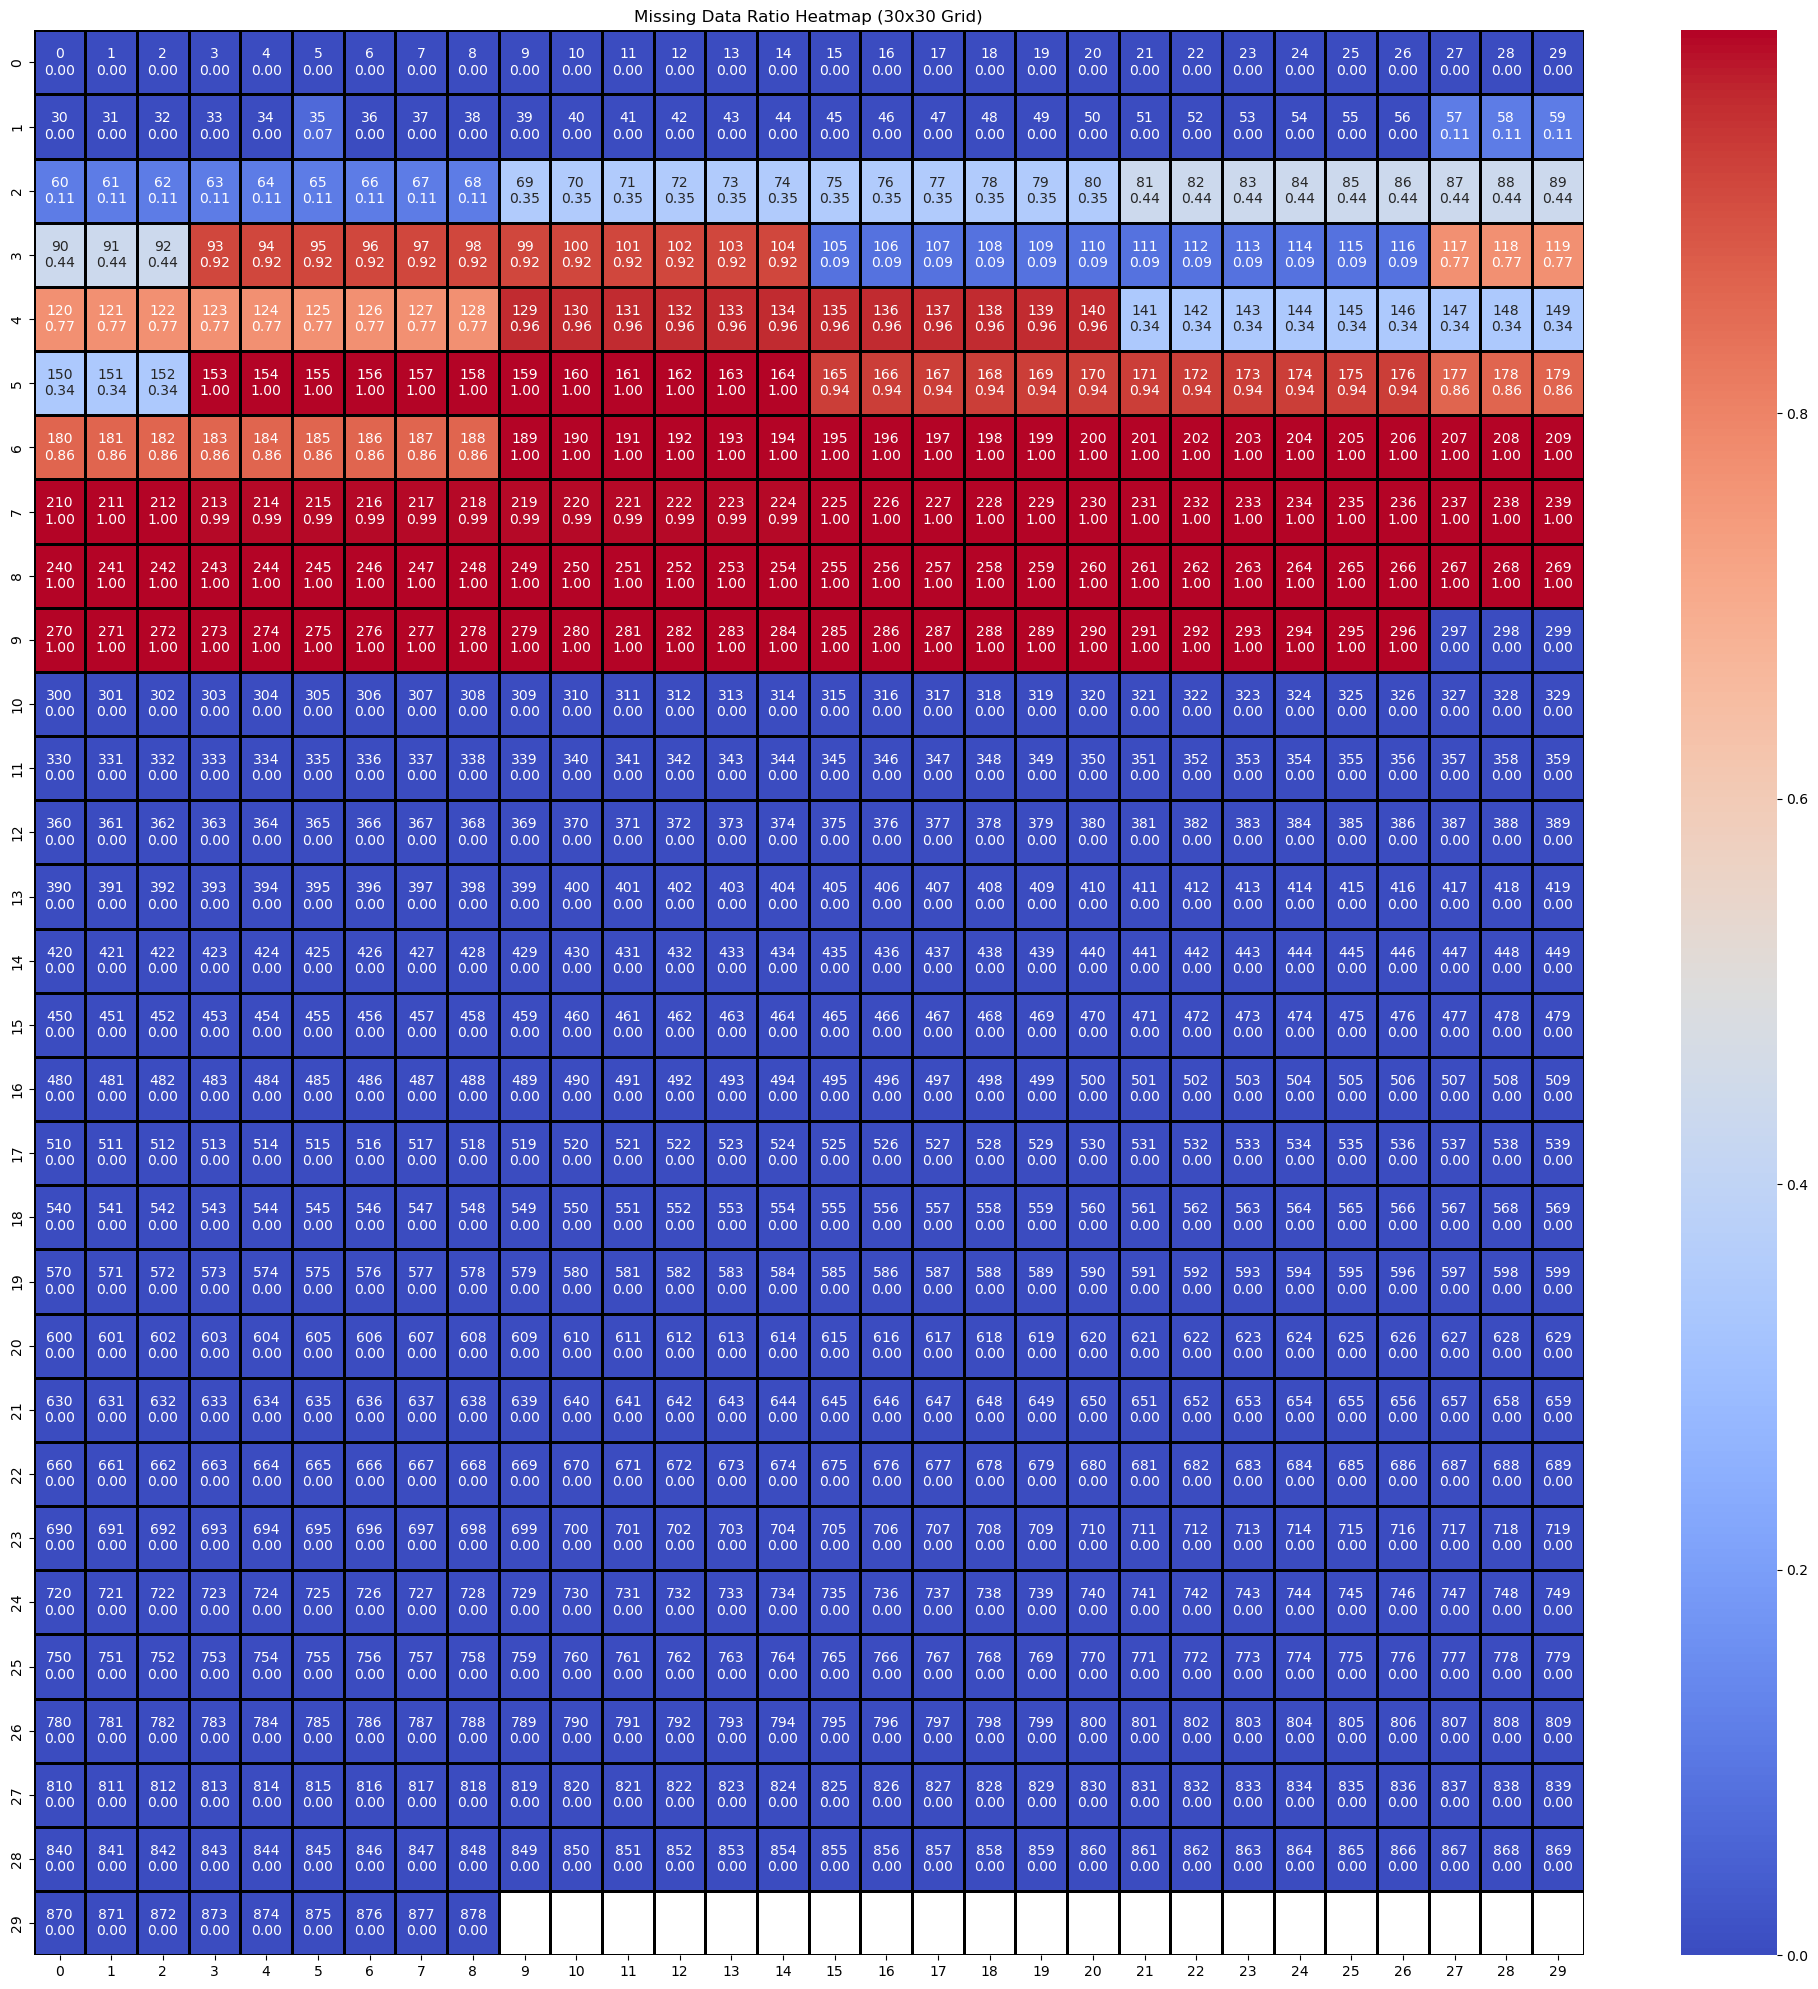

In [13]:
missing_ratio = PrintMissingRatio(none_hex_string_data)
HeatmapMissingRatio(missing_ratio)

In [40]:
# 결측치 데이터 채우기 함수
def FillMissingData(pe_data, mode):
    # 'file_name'과 'label'을 제외한 나머지 데이터만 선택
    return_pe_data = pe_data.drop(columns=['file_name', 'label'])
    
    # 숫자형 데이터만 선택
    numeric_columns = return_pe_data.select_dtypes(include=['number']).columns
    pe_data_numeric = return_pe_data[numeric_columns]

    # 결측치 채우기 방식
    if mode == 0:
        pe_data_filled = pe_data_numeric.fillna(0)
    elif mode == 1:
        pe_data_filled = pe_data_numeric.apply(lambda col: col.fillna(col.max()))
    elif mode == 2:
        pe_data_filled = pe_data_numeric.apply(lambda col: col.fillna(col.min()))
    elif mode == 3:
        pe_data_filled = pe_data_numeric.apply(lambda col: col.fillna(col.mean()))
    elif mode == 4:  
        pe_data_filled = pe_data_numeric.apply(lambda col: col.fillna(col.mode()[0]))
    else:
        print("잘못된 모드 번호입니다.")
        return pe_data 

    return_pe_data[numeric_columns] = pe_data_filled
    return_pe_data = pd.concat([pe_data[['file_name', 'label']], return_pe_data], axis=1)
    
    return return_pe_data

In [41]:
# 0으로 채우기
zero_pe_data = FillMissingData(none_hex_string_data, 0)
zero_pe_data_path = r".\data\missing_ratio\extract_feature(PE_missing_zero).csv"
zero_pe_data.to_csv(zero_pe_data_path)

# 가장 큰 값으로 채우기
max_pe_data = FillMissingData(none_hex_string_data, 1)
max_pe_data_path = r".\data\missing_ratio\extract_feature(PE_missing_max).csv"
max_pe_data.to_csv(max_pe_data_path)

# 가장 작은 값으로 채우기
min_pe_data = FillMissingData(none_hex_string_data, 2)
min_pe_data_path = r".\data\missing_ratio\extract_feature(PE_missing_min).csv"
min_pe_data.to_csv(min_pe_data_path)

# 평균 값으로 채우기
mean_pe_data = FillMissingData(none_hex_string_data, 3)
mean_pe_data_path = r".\data\missing_ratio\extract_feature(PE_missing_mean).csv"
mean_pe_data.to_csv(mean_pe_data_path)

# 가장 많이 등장한 값으로 채우기
appear_pe_data = FillMissingData(none_hex_string_data, 4)
appear_pe_data_path = r".\data\missing_ratio\extract_feature(PE_missing_appear).csv"
appear_pe_data.to_csv(appear_pe_data_path)


In [15]:
# 경로
zero_pe_data_path = r".\data\missing_ratio\extract_feature(PE_missing_zero).csv"
max_pe_data_path = r".\data\missing_ratio\extract_feature(PE_missing_max).csv"
min_pe_data_path = r".\data\missing_ratio\extract_feature(PE_missing_min).csv"
mean_pe_data_path = r".\data\missing_ratio\extract_feature(PE_missing_mean).csv"
appear_pe_data_path = r".\data\missing_ratio\extract_feature(PE_missing_appear).csv"


# 원하는 데이터로 결측치 결정
# missing_data = pd.read_csv(zero_pe_data_path)
# missing_data = pd.read_csv(max_pe_data_path)
# missing_data = pd.read_csv(min_pe_data_path)
# missing_data = pd.read_csv(mean_pe_data_path)
missing_data = pd.read_csv(appear_pe_data_path)

missing_data = missing_data.drop(columns=['Unnamed: 0'])
missing_data

,file_name,label,DOS_HEADER/e_magic,DOS_HEADER/e_cblp,DOS_HEADER/e_cp,DOS_HEADER/e_crlc,DOS_HEADER/e_cparhdr,DOS_HEADER/e_minalloc,DOS_HEADER/e_maxalloc,DOS_HEADER/e_ss,...,byte_entropy_histogram_54,byte_entropy_histogram_55,byte_entropy_histogram_56,byte_entropy_histogram_57,byte_entropy_histogram_58,byte_entropy_histogram_59,byte_entropy_histogram_60,byte_entropy_histogram_61,byte_entropy_histogram_62,byte_entropy_histogram_63
0,1137362895688720987655305141407196041146519468...,0,23117,144,3,0,4,0,65535,0,...,33965,33817,7203,4887,3189,5669,2300,1939,1660,1825
1,2848155905708583992408892664162745979911072662...,1,23117,144,3,0,4,0,65535,0,...,0,0,0,0,0,0,0,0,0,0
2,9220689313678134197264299136406578309685149196...,0,23117,144,3,0,4,0,65535,0,...,15856,33605,0,0,0,0,0,0,0,0
3,1036669274663769240135268653641244320268856070...,0,23117,80,2,0,4,15,65535,0,...,121606,249421,0,0,0,0,0,0,0,0
4,1930422337147264060739149983746607776888460452...,0,23117,144,3,0,4,0,65535,0,...,36231,107965,31087,30321,29759,31268,29651,30198,30093,31335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25968,9fe0df51775c3935b1f385a5b924bd53218f0711378cbe...,1,23117,144,3,0,4,0,65535,0,...,0,0,0,0,0,0,0,0,0,0
25969,9feb6a6642431a56b6699ffd28a8785e2d711c60d5c571...,1,23117,144,3,0,4,0,65535,0,...,20432,33045,357,245,239,255,205,240,271,236
25970,9fedf5206131f12fc47c5025397003a9a4b474a7e24338...,1,23117,144,3,0,4,0,65535,0,...,0,0,0,0,0,0,0,0,0,0
25971,9ff57f0d96d9acd70a97443615827c202175da5827ff23...,1,23117,144,3,0,4,0,65535,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#결측치 확인 (결측치가 없는 것을 확인하고 넘어가기)
PrintMissingRatio(missing_data)

------------결측치------------

DOS_HEADER/e_magic           0.0
DOS_HEADER/e_cblp            0.0
DOS_HEADER/e_cp              0.0
DOS_HEADER/e_crlc            0.0
DOS_HEADER/e_cparhdr         0.0
                            ... 
byte_entropy_histogram_59    0.0
byte_entropy_histogram_60    0.0
byte_entropy_histogram_61    0.0
byte_entropy_histogram_62    0.0
byte_entropy_histogram_63    0.0
Length: 879, dtype: float64

-----------------------------

결측치가 존재하는 column
Series([], dtype: float64)

-----------------------------



DOS_HEADER/e_magic           0.0
DOS_HEADER/e_cblp            0.0
DOS_HEADER/e_cp              0.0
DOS_HEADER/e_crlc            0.0
DOS_HEADER/e_cparhdr         0.0
                            ... 
byte_entropy_histogram_59    0.0
byte_entropy_histogram_60    0.0
byte_entropy_histogram_61    0.0
byte_entropy_histogram_62    0.0
byte_entropy_histogram_63    0.0
Length: 879, dtype: float64

# column 제거

(주의 : 아래의 1, 2번 중 데이터를 하나만 사용)

1. 상관 관계

2. 엔트로피

# 상관 관계


관련 없는 일부 데이터 제거 (안해도 상관없음)

In [24]:
# 상관관계가 높은 피처 추출
def get_highly_correlated_features(pe_data, threshold=0.8):
    # 상삼각 행렬만 추출하여 중복 제거
    upper = pe_data.where(np.triu(np.ones(pe_data.shape), k=1).astype(bool))
    return_pe_data = [column for column in upper.columns if any(upper[column] > threshold)]
    return return_pe_data

In [27]:
# threshold의 값을 변경해 데이터 삭제
threshold = 0.9

correlation_matrix = missing_data.drop(columns=['file_name', 'label'])

correlation_matrix = correlation_matrix.corr().abs()

highly_correlated_features = get_highly_correlated_features(correlation_matrix, threshold)

correlation_pe_data = missing_data.drop(columns=highly_correlated_features)

correlation_pe_data_path = r".\data\correlation\extract_feature(PE_correlation).csv"
correlation_pe_data.to_csv(correlation_pe_data_path)

# 엔트로피

1. 엔트로피 계산

2. 엔트로피 히트맵 출력

3. column 제거 (엔트로피 활용)

In [46]:
# 엔트로피 계산 함수
def CalculateEntropy(series):
    value_counts = series.value_counts(normalize=True)
    return -np.sum(value_counts * np.log2(value_counts))

# 필수 데이터 엔트로피 계산
def CalculateEssentialEntropy(pe_data):
    essential_data = pe_data.drop(columns=['file_name', 'label'])
    entropy = essential_data.apply(CalculateEntropy)
    return entropy

In [47]:
# 엔트로피 히트맵 출력
def HeatmapEntropy(entropy):
    # 데이터 개수를 만족하는 최소 값의 N 계산
    n = int(np.ceil(np.sqrt(len(entropy))))

    # 인덱스와 결측치 비율을 list로 저장
    index = []
    for i in range(len(entropy)):
        index.append(i)
    index_padding = index + [np.nan] * (n**2 - len(index))
    entorpy_padding = entropy.values.tolist() + [np.nan] * (n**2 - len(entropy))

    # 인덱스와 결측치 비율을 NxN 형식으로 저장
    index_2d = np.array(index_padding).reshape(n, n)
    entropy_2d = np.array(entorpy_padding).reshape(n, n)

    # 히트맵 표시 데이터 저장
    annot = []
    for i in range(n):
        row = []
        for j in range(n):
            if not np.isnan(entropy_2d[i, j]):
                value = f"{int(index_2d[i, j])}\n{entropy_2d[i, j]:.2f}"
            else:
                value = "" 
            row.append(value)
        annot.append(row)  


    # 히트맵으로 데이터 출력
    plt.figure(figsize=(25, 25))
    sns.heatmap(entropy_2d, cmap='coolwarm', cbar=True, linewidths=1, linecolor='black', annot=annot, fmt="")
    plt.title(f"Entropy Heatmap ({n}x{n} Grid)")
    entropy_heatmap_path = r".\data\entropy\entropy_heatmap.png"
    plt.savefig(entropy_heatmap_path, bbox_inches='tight', dpi=300)
    plt.show()


-----------엔트로피-----------

DOS_HEADER/e_magic          -0.000000
DOS_HEADER/e_cblp            0.624388
DOS_HEADER/e_cp              0.611754
DOS_HEADER/e_crlc            0.061869
DOS_HEADER/e_cparhdr         0.092453
                               ...   
byte_entropy_histogram_59    8.816476
byte_entropy_histogram_60    8.677298
byte_entropy_histogram_61    8.636531
byte_entropy_histogram_62    8.637455
byte_entropy_histogram_63    8.647964
Length: 879, dtype: float64

-----------------------------



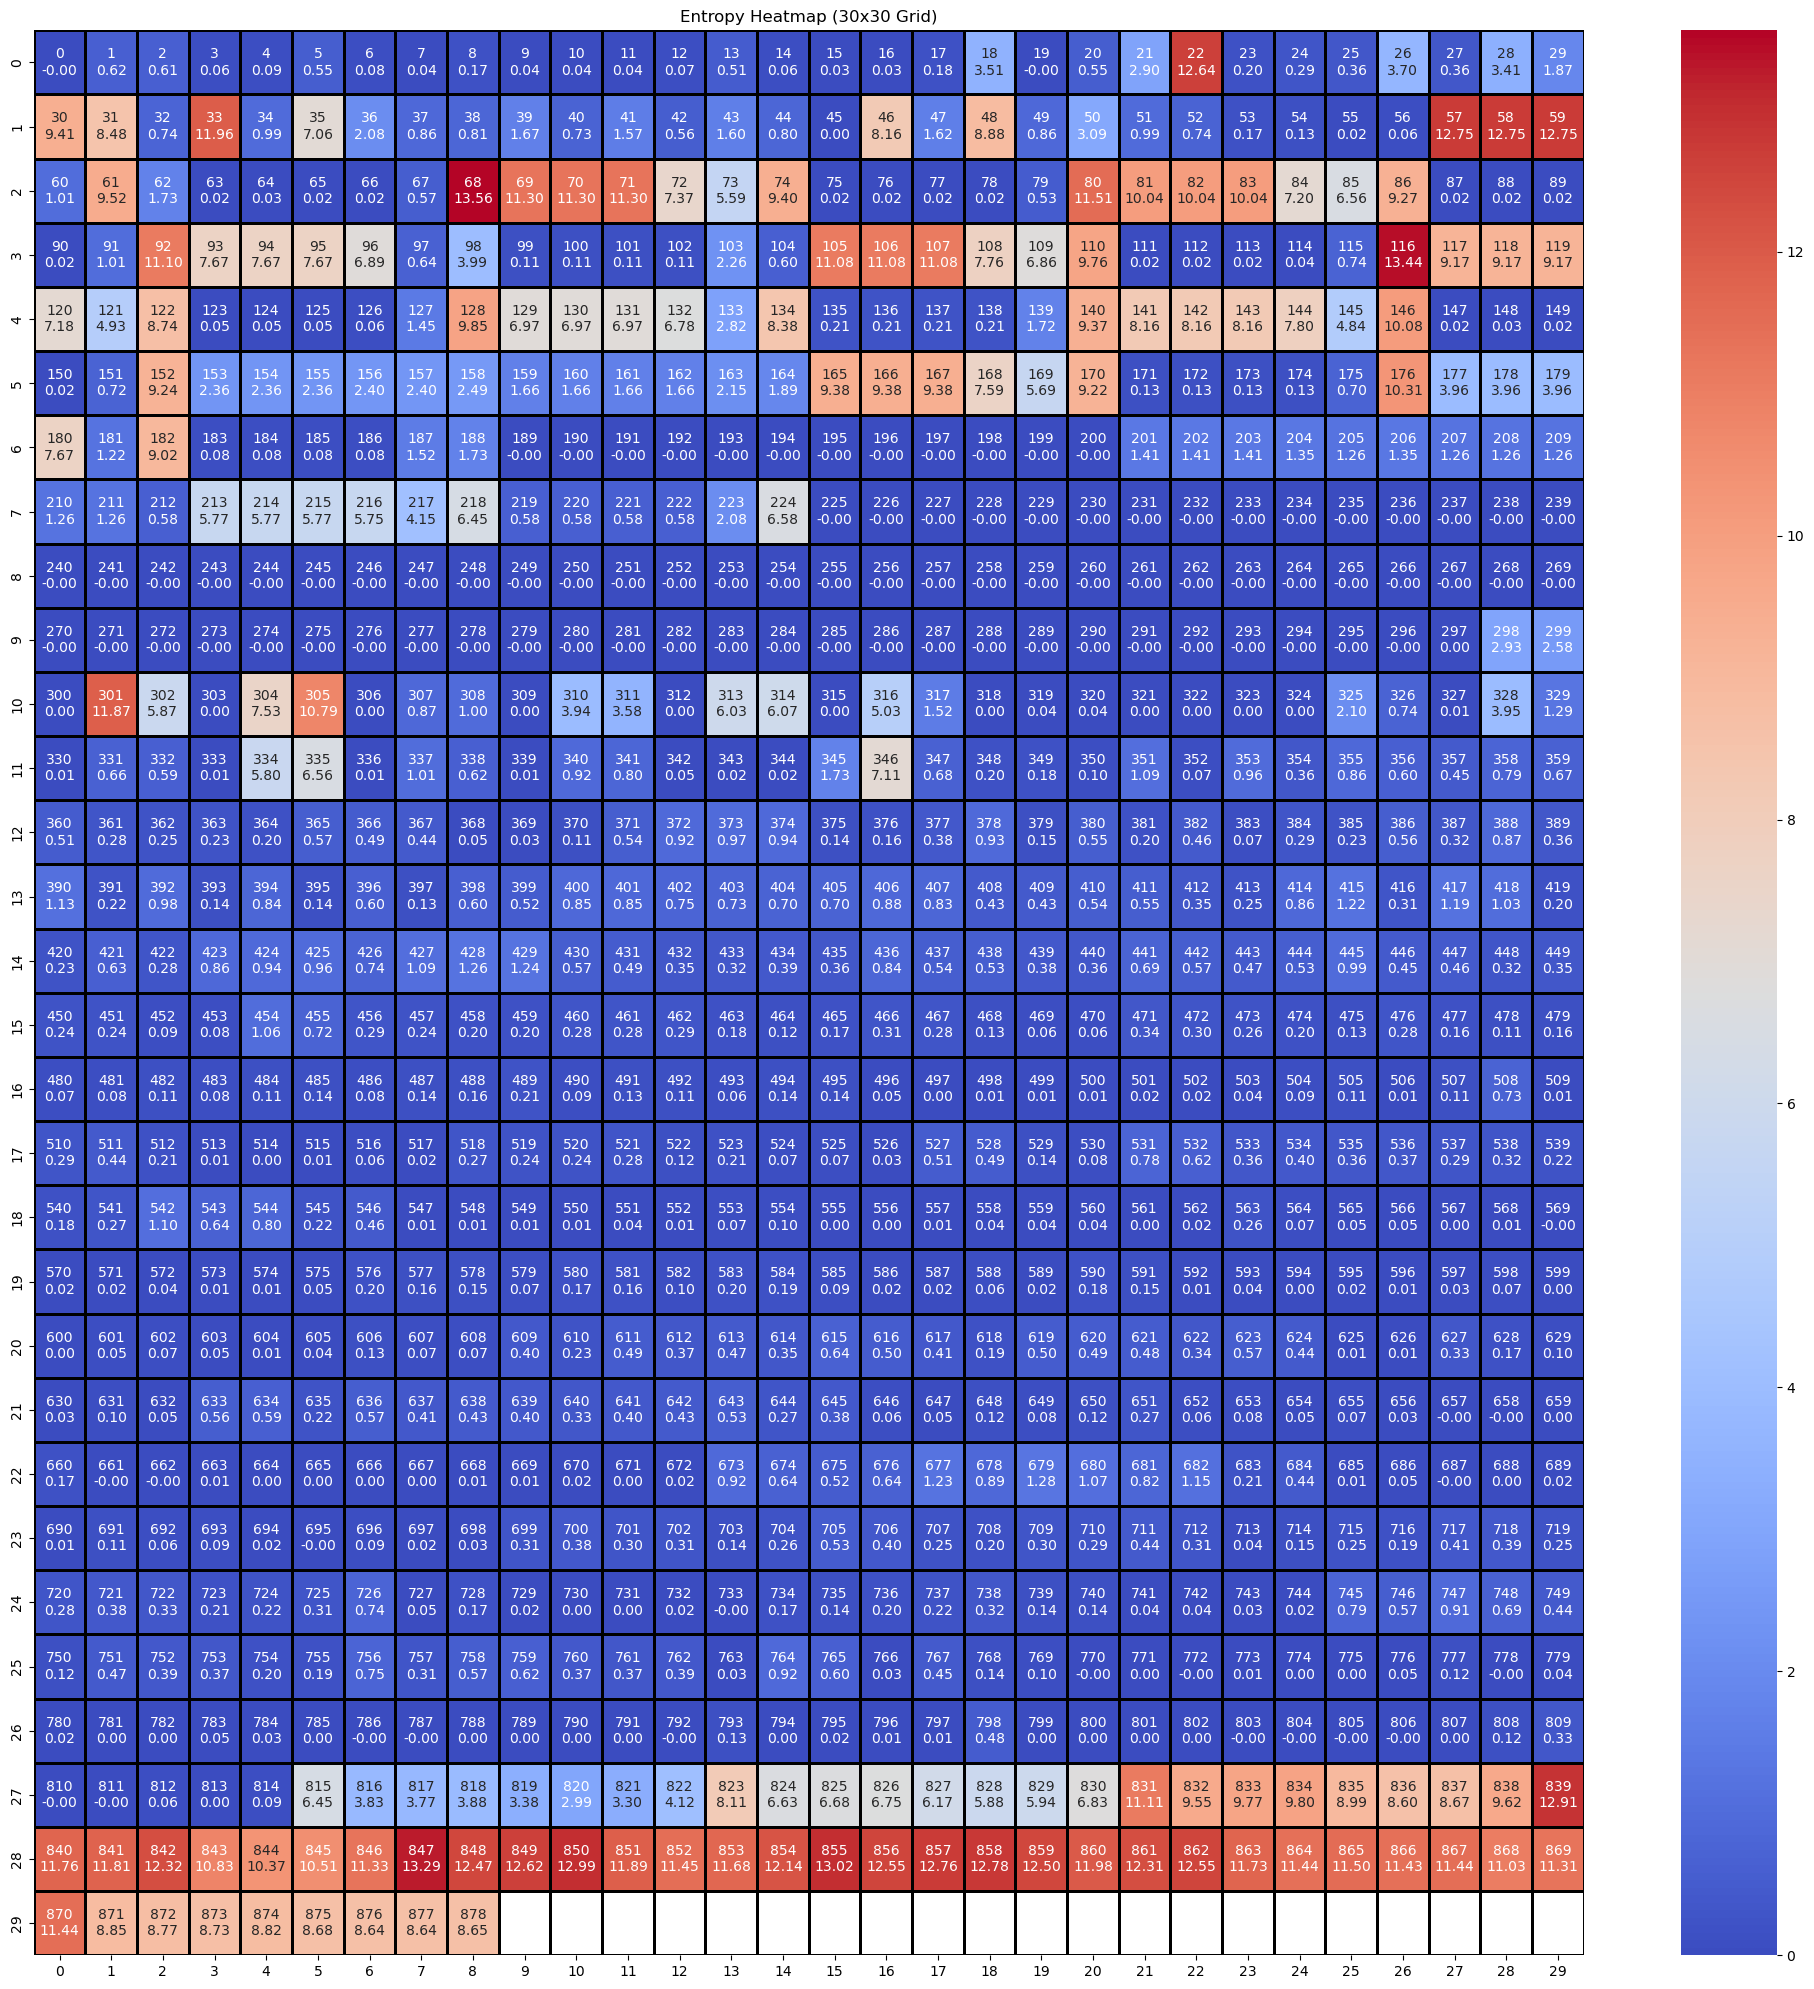

In [48]:
columns_entropy = CalculateEssentialEntropy(pe_data)
print("-----------엔트로피-----------\n")
print(columns_entropy)
print("\n-----------------------------\n")
HeatmapEntropy(columns_entropy)

In [50]:
# 엔트로피를 활용한 column 제거
def RemoveColumnsByEntropy(data, threshold, mode):
    
    entropy = CalculateEssentialEntropy(data)
    
    if mode == 0: # 엔트로피가 낮은 n%의 columns 제거 
        threshold_value = entropy.quantile(threshold/100) # 0~100까지의 숫자 입력
        columns_to_remove = entropy[entropy <= threshold_value].index
    elif mode == 1:
        columns_to_remove = entropy.nsmallest(threshold).index
    elif mode == 2:
        columns_to_remove = entropy[entropy <= threshold].index
    
    # 해당 컬럼들을 제거한 데이터프레임 반환
    df_cleaned = data.drop(columns=columns_to_remove)
    
    return df_cleaned

In [53]:
# 낮은 n% column 제거
entropy_x = 35
entropy_0_pe_data = RemoveColumnsByEntropy(missing_data, entropy_x, 0)
entropy_0_pe_data_path = r".\data\entropy\extract_feature(PE_entropy_0).csv"
entropy_0_pe_data.to_csv(entropy_0_pe_data_path)

# 낮은 n개 column 제거
entropy_n = 300
entropy_1_pe_data = RemoveColumnsByEntropy(missing_data, entropy_n, 1)
entropy_1_pe_data_path = r".\data\entropy\extract_feature(PE_entropy_1).csv"
entropy_1_pe_data.to_csv(entropy_1_pe_data_path)

# 특정 n보다 작은 column 제거
entropy_n = 0.5
entropy_2_pe_data = RemoveColumnsByEntropy(missing_data, entropy_n, 2)
entropy_2_pe_data_path = r".\data\entropy\extract_feature(PE_entropy_2).csv"
entropy_2_pe_data.to_csv(entropy_2_pe_data_path)

In [28]:
# 데이터 경로
correlation_pe_data_path = r".\data\correlation\extract_feature(PE_correlation).csv"
entropy_0_pe_data_path = r".\data\entropy\extract_feature(PE_entropy_0).csv"
entropy_1_pe_data_path = r".\data\entropy\extract_feature(PE_entropy_1).csv"
entropy_2_pe_data_path = r".\data\entropy\extract_feature(PE_entropy_2).csv"


# 원하는 데이터로 데이터 결정
correlation_entropy_data = pd.read_csv(correlation_pe_data_path)
# correlation_entropy_data = pd.read_csv(entropy_0_pe_data_path)
# correlation_entropy_data = pd.read_csv(entropy_1_pe_data_path)
# correlation_entropy_data = pd.read_csv(entropy_2_pe_data_path)

correlation_entropy_data = correlation_entropy_data.drop(columns=['Unnamed: 0'])
correlation_entropy_data

,file_name,label,DOS_HEADER/e_magic,DOS_HEADER/e_cblp,DOS_HEADER/e_crlc,DOS_HEADER/e_cparhdr,DOS_HEADER/e_minalloc,DOS_HEADER/e_maxalloc,DOS_HEADER/e_ss,DOS_HEADER/e_sp,...,byte_entropy_histogram_42,byte_entropy_histogram_43,byte_entropy_histogram_44,byte_entropy_histogram_45,byte_entropy_histogram_46,byte_entropy_histogram_47,byte_entropy_histogram_48,byte_entropy_histogram_49,byte_entropy_histogram_50,byte_entropy_histogram_56
0,1137362895688720987655305141407196041146519468...,0,23117,144,0,4,0,65535,0,184,...,110578,34501,74122,13286,52673,46083,71297,28333,74482,7203
1,2848155905708583992408892664162745979911072662...,1,23117,144,0,4,0,65535,0,184,...,297,1288,67,76,78,55,0,0,0,0
2,9220689313678134197264299136406578309685149196...,0,23117,144,0,4,0,65535,0,184,...,37309,35877,24984,38793,21915,43630,89652,18596,22319,0
3,1036669274663769240135268653641244320268856070...,0,23117,80,0,4,15,65535,0,184,...,111551,111597,72490,30645,44040,82050,268892,132624,203900,0
4,1930422337147264060739149983746607776888460452...,0,23117,144,0,4,0,65535,0,184,...,11593,15352,12148,3917,5112,18823,130470,43186,83497,31087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25968,9fe0df51775c3935b1f385a5b924bd53218f0711378cbe...,1,23117,144,0,4,0,65535,0,184,...,1299,2491,493,407,339,218,0,0,0,0
25969,9feb6a6642431a56b6699ffd28a8785e2d711c60d5c571...,1,23117,144,0,4,0,65535,0,184,...,23428,13444,28399,4643,22585,29242,48632,18942,26639,357
25970,9fedf5206131f12fc47c5025397003a9a4b474a7e24338...,1,23117,144,0,4,0,65535,0,184,...,168,822,29,20,14,16,0,0,0,0
25971,9ff57f0d96d9acd70a97443615827c202175da5827ff23...,1,23117,144,0,4,0,65535,0,184,...,1765,3802,893,498,495,557,0,0,0,0


# 정규화화

1. 정규화 함수

In [55]:
NORMALIZE_VALUE ={
    "0":"Normalizer",
    "1":"MinMaxScaler",
    "2":"MaxAbsScaler"
}

In [56]:
# 정규화 함수
def NormalizeData(data, mode):
    if mode == 0:
        scaler = Normalizer()  # 벡터 크기를 기준으로 정규화
    elif mode == 1:
        scaler = MinMaxScaler()  # 0과 1 사이로 정규화
    elif mode == 2:
        scaler = MaxAbsScaler()  # 최대 절댓값을 기준으로 정규화
    else:
        print("정규화 오류(normalize_data) : 입력값이 잘못되었습니다.")
    
    normalized_data = scaler.fit_transform(data)

    return normalized_data

In [57]:
# file_name, label 제거 후 정규화 진행
def SelectNormalizeMode(data, mode):
    normalize_data = data.drop(columns = ['file_name', 'label'])
    numeric_columns = normalize_data.select_dtypes(include=['number']).columns
    numeric_data = data[numeric_columns]

    # 정규화
    normalize_numeric_data = NormalizeData(numeric_data, mode)
            
    # 최종 데이터 생성
    normalize_data[numeric_columns] = normalize_numeric_data
    normalize_data = pd.concat([data[['file_name', 'label']], normalize_data], axis=1)

    return normalize_data

In [ ]:
normalize_0_pe_data = SelectNormalizeMode(correlation_entropy_data, 0)
normalize_0_pe_data_path = r".\data\normalize\extract_feature(PE_normalize_0).csv"
normalize_0_pe_data.to_csv(normalize_0_pe_data_path)

normalize_1_pe_data = SelectNormalizeMode(correlation_entropy_data, 1)
normalize_1_pe_data_path = r".\data\normalize\extract_feature(PE_normalize_1).csv"
normalize_1_pe_data.to_csv(normalize_1_pe_data_path)

normalize_2_pe_data = SelectNormalizeMode(correlation_entropy_data, 2)
normalize_2_pe_data_path = r".\data\normalize\extract_feature(PE_normalize_2).csv"
normalize_2_pe_data.to_csv(normalize_2_pe_data_path)

In [59]:
# 경로
normalize_0_pe_data_path = r".\data\normalize\extract_feature(PE_normalize_0).csv"
normalize_1_pe_data_path = r".\data\normalize\extract_feature(PE_normalize_1).csv"
normalize_2_pe_data_path = r".\data\normalize\extract_feature(PE_normalize_2).csv"

# 원하는 데이터로 정규화 결정
normalize_data = pd.read_csv(normalize_0_pe_data_path)
# normalize_data = pd.read_csv(normalize_1_pe_data_path)
# normalize_data = pd.read_csv(normalize_2_pe_data_path)

normalize_data = normalize_data.drop(columns=['Unnamed: 0'])
normalize_data

,file_name,label,DOS_HEADER/e_cblp,DOS_HEADER/e_cp,DOS_HEADER/e_minalloc,DOS_HEADER/e_ovno,DOS_HEADER/e_lfanew,FILE_HEADER/Machine,FILE_HEADER/NumberOfSections,FILE_HEADER/TimeDateStamp,...,byte_entropy_histogram_54,byte_entropy_histogram_55,byte_entropy_histogram_56,byte_entropy_histogram_57,byte_entropy_histogram_58,byte_entropy_histogram_59,byte_entropy_histogram_60,byte_entropy_histogram_61,byte_entropy_histogram_62,byte_entropy_histogram_63
0,1137362895688720987655305141407196041146519468...,0,1.855916e-08,3.866491e-10,0.000000e+00,0.000000e+00,3.402512e-08,4.434092e-06,7.732983e-10,0.190907,...,4.377513e-06,4.358438e-06,9.283446e-07,6.298514e-07,4.110080e-07,7.306380e-07,2.964310e-07,2.499042e-07,2.139459e-07,2.352116e-07
1,2848155905708583992408892664162745979911072662...,1,3.330787e-08,6.939139e-10,0.000000e+00,0.000000e+00,2.960699e-08,7.679314e-08,6.939139e-10,0.342169,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,9220689313678134197264299136406578309685149196...,0,1.758064e-08,3.662634e-10,0.000000e+00,0.000000e+00,3.125447e-08,5.325469e-06,1.098790e-09,0.367930,...,1.935824e-06,4.102760e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,1036669274663769240135268653641244320268856070...,0,1.939991e-08,4.849978e-10,3.637484e-09,6.304972e-09,6.207972e-08,8.050964e-08,2.182490e-09,0.171930,...,2.948932e-05,6.048432e-05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,1930422337147264060739149983746607776888460452...,0,3.334479e-08,6.946832e-10,0.000000e+00,0.000000e+00,6.483710e-08,7.687827e-08,1.620927e-09,0.339311,...,8.389689e-06,2.500049e-05,7.198539e-06,7.021163e-06,6.891026e-06,7.240452e-06,6.866017e-06,6.992681e-06,6.968367e-06,7.255966e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25968,9fe0df51775c3935b1f385a5b924bd53218f0711378cbe...,1,3.303851e-08,6.883024e-10,0.000000e+00,0.000000e+00,2.936757e-08,7.617213e-08,6.883024e-10,0.362356,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25969,9feb6a6642431a56b6699ffd28a8785e2d711c60d5c571...,1,3.271137e-08,6.814868e-10,0.000000e+00,0.000000e+00,5.815354e-08,7.541788e-08,1.135811e-09,0.385268,...,4.641380e-06,7.506577e-06,8.109693e-08,5.565476e-08,5.429178e-08,5.792638e-08,4.656827e-08,5.451895e-08,6.156098e-08,5.361030e-08
25970,9fedf5206131f12fc47c5025397003a9a4b474a7e24338...,1,3.276407e-08,6.825847e-10,0.000000e+00,0.000000e+00,2.912361e-08,7.827882e-06,4.550565e-10,0.381672,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25971,9ff57f0d96d9acd70a97443615827c202175da5827ff23...,1,3.296598e-08,6.867912e-10,0.000000e+00,0.000000e+00,2.930309e-08,7.600489e-08,6.867912e-10,0.367576,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


# 표준화

1. 표준화 함수

In [60]:
STANDARDIZE_VALUE = {
    "0":"StandardScaler",
    "1":"RobustScaler",
    "2":"PowerTransformer"
}

In [61]:
# 표준화
def StandardizeData(data, mode):
    if mode == 0:
        scaler = StandardScaler()  # 평균 0, 표준편차 1로 표준화
    elif mode == 1:
        scaler = RobustScaler()  # 중앙값과 IQR을 기준으로 표준화
    elif mode == 2:
        scaler = PowerTransformer()  # 비정규 분포 데이터를 정규 분포로 변환
    else:
        print("표준화 오류(standardize_data) : 입력값이 잘못되었습니다.")
    
    standardized_data = scaler.fit_transform(data)
    return standardized_data

In [62]:
# file_name, label 제거 후 표준화 진행
def SelectStandardizeMode(data, mode):
    standardize_data = data.drop(columns = ['file_name', 'label'])
    numeric_columns = standardize_data.select_dtypes(include=['number']).columns
    numeric_data = data[numeric_columns]

    # 표준화
    standardize_numeric_data = StandardizeData(numeric_data, mode)

    # 최종 데이터 생성
    standardize_data[numeric_columns] = standardize_numeric_data
    standardize_data = pd.concat([data[['file_name', 'label']], standardize_data], axis=1)
    
    return standardize_data


In [63]:
standardize_0_pe_data = SelectStandardizeMode(normalize_data, 0)
standardize_0_pe_data_path = r".\data\standardize\extract_feature(PE_standardize_0).csv"
standardize_0_pe_data.to_csv(standardize_0_pe_data_path)

standardize_1_pe_data = SelectStandardizeMode(normalize_data, 1)
standardize_1_pe_data_path = r".\data\standardize\extract_feature(PE_standardize_1).csv"
standardize_1_pe_data.to_csv(standardize_1_pe_data_path)

standardize_2_pe_data = SelectStandardizeMode(normalize_data, 2)
standardize_2_pe_data_path = r".\data\standardize\extract_feature(PE_standardize_2).csv"
standardize_2_pe_data.to_csv(standardize_2_pe_data_path)

In [64]:
# 경로
standardize_0_pe_data_path = r".\data\standardize\extract_feature(PE_standardize_0).csv"
standardize_1_pe_data_path = r".\data\standardize\extract_feature(PE_standardize_1).csv"
standardize_2_pe_data_path = r".\data\standardize\extract_feature(PE_standardize_2).csv"

# 원하는 데이터로 표준화 결정
standardize_data = pd.read_csv(standardize_0_pe_data_path)
# standardize_data = pd.read_csv(standardize_1_pe_data_path)
# standardize_data = pd.read_csv(standardize_2_pe_data_path)

standardize_data = standardize_data.drop(columns=['Unnamed: 0'])
standardize_data

,file_name,label,DOS_HEADER/e_cblp,DOS_HEADER/e_cp,DOS_HEADER/e_minalloc,DOS_HEADER/e_ovno,DOS_HEADER/e_lfanew,FILE_HEADER/Machine,FILE_HEADER/NumberOfSections,FILE_HEADER/TimeDateStamp,...,byte_entropy_histogram_54,byte_entropy_histogram_55,byte_entropy_histogram_56,byte_entropy_histogram_57,byte_entropy_histogram_58,byte_entropy_histogram_59,byte_entropy_histogram_60,byte_entropy_histogram_61,byte_entropy_histogram_62,byte_entropy_histogram_63
0,1137362895688720987655305141407196041146519468...,0,-0.106545,-0.041689,-0.041748,-0.047650,-0.067313,2.771759,-0.205796,-1.114374,...,-0.063612,-0.166227,-0.166859,-0.175484,-0.176136,-0.173459,-0.180175,-0.182669,-0.182764,-0.184818
1,2848155905708583992408892664162745979911072662...,1,-0.029188,-0.039975,-0.041748,-0.047650,-0.089476,-0.246471,-0.257172,0.258766,...,-0.253104,-0.295509,-0.191506,-0.193863,-0.187972,-0.195076,-0.188933,-0.190289,-0.189206,-0.191783
2,9220689313678134197264299136406578309685149196...,0,-0.111677,-0.041803,-0.041748,-0.047650,-0.081212,3.389202,0.004856,0.492623,...,-0.169307,-0.173811,-0.191506,-0.193863,-0.187972,-0.195076,-0.188933,-0.190289,-0.189206,-0.191783
3,1036669274663769240135268653641244320268856070...,0,-0.102135,-0.041141,-0.028560,-0.028289,0.073424,-0.243896,0.706207,-1.286647,...,1.023416,1.498600,-0.191506,-0.193863,-0.187972,-0.195076,-0.188933,-0.190289,-0.189206,-0.191783
4,1930422337147264060739149983746607776888460452...,0,-0.028994,-0.039971,-0.041748,-0.047650,0.087256,-0.246412,0.342774,0.232823,...,0.110065,0.446065,-0.000385,0.011015,0.010471,0.019138,0.013920,0.022916,0.020602,0.023051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25968,9fe0df51775c3935b1f385a5b924bd53218f0711378cbe...,1,-0.030601,-0.040006,-0.041748,-0.047650,-0.090677,-0.246901,-0.260804,0.442021,...,-0.253104,-0.295509,-0.191506,-0.193863,-0.187972,-0.195076,-0.188933,-0.190289,-0.189206,-0.191783
25969,9feb6a6642431a56b6699ffd28a8785e2d711c60d5c571...,1,-0.032317,-0.040044,-0.041748,-0.047650,0.053728,-0.247423,0.028816,0.650013,...,-0.052190,-0.072846,-0.189353,-0.192239,-0.186409,-0.193362,-0.187557,-0.188627,-0.187352,-0.190195
25970,9fedf5206131f12fc47c5025397003a9a4b474a7e24338...,1,-0.032040,-0.040038,-0.041748,-0.047650,-0.091901,5.122582,-0.411756,0.617369,...,-0.253104,-0.295509,-0.191506,-0.193863,-0.187972,-0.195076,-0.188933,-0.190289,-0.189206,-0.191783
25971,9ff57f0d96d9acd70a97443615827c202175da5827ff23...,1,-0.030981,-0.040015,-0.041748,-0.047650,-0.091001,-0.247017,-0.261782,0.489408,...,-0.253104,-0.295509,-0.191506,-0.193863,-0.187972,-0.195076,-0.188933,-0.190289,-0.189206,-0.191783


# 딥러닝

1. 데이터 분할

2. 모델 생성

3. 학습

4. f1 score 출력

# 딥러닝

In [ ]:
y = standardize_data['label']
X = standardize_data.drop(columns=['file_name', 'label'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [ ]:
# 모델 정의
model = Sequential()

model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/1000
520/520 [==============================] - 10s 20ms/step - loss: 0.1416 - accuracy: 0.9437 - val_loss: 0.1990 - val_accuracy: 0.9288
Epoch 2/1000
520/520 [==============================] - 10s 20ms/step - loss: 0.1341 - accuracy: 0.9479 - val_loss: 0.2170 - val_accuracy: 0.9278
Epoch 3/1000
520/520 [==============================] - 10s 19ms/step - loss: 0.1376 - accuracy: 0.9470 - val_loss: 0.2060 - val_accuracy: 0.9254
Epoch 4/1000
520/520 [==============================] - 10s 18ms/step - loss: 0.1380 - accuracy: 0.9468 - val_loss: 0.2077 - val_accuracy: 0.9302


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'테스트 데이터에서의 정확도: {accuracy * 100:.2f}%')

163/163 [==============================] - 1s 5ms/step - loss: 0.2062 - accuracy: 0.9326
테스트 데이터에서의 정확도: 93.26%


# 머신 러닝

In [ ]:
# 머신 러닝
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# 데이터 로드
data = pd.read_csv(r"C:\Users\USER\Desktop\jaejudo\AI\data\standardize\extract_feature(PE_standardize_0).csv")

# 특징과 레이블 준비
y = data['label']
X = data.drop(columns=['file_name', 'label'], axis=1)

# 데이터를 훈련 데이터와 테스트 데이터로 분할 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForest 모델 정의
rf_model = RandomForestClassifier(n_estimators=100)

# K-Fold Cross Validation 적용 (예: 5-Fold)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=4, scoring='accuracy')

# K-Fold Cross Validation의 평균 정확도
print(f'K-Fold Cross Validation 정확도: {np.mean(cv_scores) * 100:.2f}%')

# 모델을 전체 훈련 데이터로 학습
rf_model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = rf_model.predict(X_test)

# 정확도 평가
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'테스트 데이터 정확도: {accuracy * 100:.2f}%')


K-Fold Cross Validation 정확도: 96.36%
테스트 데이터 정확도: 96.77%
